<center><b><font size="5">Looking for Landau poles</font></b></center>

In [1]:
%matplotlib inline
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
#import math
from scipy import pi
from sympy import Rational, sqrt, Symbol, init_printing

In [2]:
# local packages
# from plothelp import label_line
from smgroup import *
from constants import *

In [3]:
init_printing(use_latex='mathjax')

##  RGE coefficients

### Definition of 1- and 2-loop RGE 

In [4]:
ng = Symbol('n_g')  # number of generations
nh = Symbol('n_h')  # number of SM Higgs doublets = 1
# we count only left-handed particles
SMfermions = [
    Weyl(1, 2, -1, ng),  # left lepton doublet
    Weyl(1, 1,  2, ng),  # anti-right lepton singlet
    Weyl(3, 2, Rational(1,3), ng),  # left quark doublet
    Weyl(3, 1, Rational(-4,3), ng), # anti-right up quark singlet
    Weyl(3, 1, Rational(2,3), ng) # anti-right down quark singlet
    ]
SMscalars = [
    ComplexScalar(1, 2, 1, nh)     # Higgs doublet
    ]

In [5]:
def rge1L(N, BSMfermions=[], BSMscalars=[], num=False):
    """One loop RGE coefficient."""
    
    a = Rational(-11,3)*CA(N)
    for rep in SMfermions + BSMfermions:
        a += Rational(4,3) * rep.wS2(N)
    for rep in SMscalars + BSMscalars:
        a += Rational(1,3) * rep.wS2(N)
    if num:
        return float(a.subs({ng:3, nh:1}))
    else:
        return a

In [6]:
def rge1LM(BSMfermions=[], BSMscalars=[]):
    """All three one-loop RGE coefficients."""
    return np.array([rge1L(N, BSMfermions=BSMfermions, BSMscalars=BSMscalars, num=True) for N in [1,2,3]])

In [7]:
def rge2L(N, M, BSMfermions=[], BSMscalars=[], num=False):
    """Two-loop RGE coeffs. Same syntax as for one-loop."""
    
    b = 0
    if M != N:
        for rep in SMfermions + SMscalars + BSMfermions + BSMscalars:
            b += 4 * rep.wS2(N) * rep.C2(M)
    if M == N:
        b += Rational(-34,3)*CA(N)**2
        for rep in SMfermions + BSMfermions:
            b += rep.wS2(N)*(4*rep.C2(N)+Rational(20,3)*CA(N))
        for rep in SMscalars + BSMscalars:
            b += rep.wS2(N)*(4*rep.C2(N)+Rational(2,3)*CA(N))
    if num:
        return float(b.subs({ng:3, nh:1}))
    else:
        return b

In [8]:
def rge2LM(BSMfermions=[], BSMscalars=[]):
    """Whole matrix of two-loop RGE coefficients."""
    return np.array([[rge2L(N, M, BSMfermions=BSMfermions, BSMscalars=BSMscalars, num=True) for M in [1,2,3]] for N in [1,2,3]])

### Testing one loop RGE coefs

In [9]:
# Test SM values: 
[rge1L(k) for k in [1,2,3]]

⎡4⋅n_g   nₕ  4⋅n_g   nₕ   22  4⋅n_g     ⎤
⎢───── + ──, ───── + ── - ──, ───── - 11⎥
⎣  3     10    3     6    3     3       ⎦

In [10]:
# Test SM values: 
# SARAH values:  [41/10,  -19/6, -7]
[rge1L(k).subs({ng:3, nh:1}) for k in [1,2,3]]

⎡41           ⎤
⎢──, -19/6, -7⎥
⎣10           ⎦

In [11]:
# Should be: 4.1, -3.1666, -7.
rge1LM()

array([ 4.1       , -3.16666667, -7.        ])

In [12]:
# Compare to Lindner's table (new scalars)
# last row should be:   8.4*Y**2    224.   21.0
#  
Y = Symbol('Y')
for D3 in [1, 3, 6, 8]:
    for D2 in range(1, 8):
        rep = ComplexScalar(D3, D2, Y)
        print(rep, "  {:10s}  {:5s}  {:3s}".format(*[str(3*(rge1L(k, BSMscalars=[rep], num=False)-rge1L(k, num=False)).evalf(3)) for k in [1,2,3]]))

ComplexScalar(1,1,Y,1)   0.15*Y**2   0      0  
ComplexScalar(1,2,Y,1)   0.3*Y**2    0.500  0  
ComplexScalar(1,3,Y,1)   0.45*Y**2   2.00   0  
ComplexScalar(1,4,Y,1)   0.6*Y**2    5.00   0  
ComplexScalar(1,5,Y,1)   0.75*Y**2   10.0   0  
ComplexScalar(1,6,Y,1)   0.9*Y**2    17.5   0  
ComplexScalar(1,7,Y,1)   1.05*Y**2   28.0   0  
ComplexScalar(3,1,Y,1)   0.45*Y**2   0      0.500
ComplexScalar(3,2,Y,1)   0.9*Y**2    1.50   1.00
ComplexScalar(3,3,Y,1)   1.35*Y**2   6.00   1.50
ComplexScalar(3,4,Y,1)   1.8*Y**2    15.0   2.00
ComplexScalar(3,5,Y,1)   2.25*Y**2   30.0   2.50
ComplexScalar(3,6,Y,1)   2.7*Y**2    52.5   3.00
ComplexScalar(3,7,Y,1)   3.15*Y**2   84.0   3.50
ComplexScalar(6,1,Y,1)   0.9*Y**2    0      2.50
ComplexScalar(6,2,Y,1)   1.8*Y**2    3.00   5.00
ComplexScalar(6,3,Y,1)   2.7*Y**2    12.0   7.50
ComplexScalar(6,4,Y,1)   3.6*Y**2    30.0   10.0
ComplexScalar(6,5,Y,1)   4.5*Y**2    60.0   12.5
ComplexScalar(6,6,Y,1)   5.4*Y**2    105.   15.0
ComplexScalar(6,7,Y,1)   6

In [13]:
# Compare to Lindner's table (new fermions)
#  
Y = Symbol('Y')
for D3 in [1, 3, 6, 8]:
    for D2 in range(1, 8):
        rep = Weyl(D3, D2, Y)
        print(rep, "  {:10s}  {:5s}  {:3s}".format(*[str((1.5*(rge1L(k, BSMfermions=[rep], num=False)-rge1L(k, num=False))).evalf(3)) for k in [1,2,3]]))

Weyl(1,1,Y,1)   0.15*Y**2   0      0  
Weyl(1,2,Y,1)   0.3*Y**2    0.500  0  
Weyl(1,3,Y,1)   0.45*Y**2   2.00   0  
Weyl(1,4,Y,1)   0.6*Y**2    5.00   0  
Weyl(1,5,Y,1)   0.75*Y**2   10.0   0  
Weyl(1,6,Y,1)   0.9*Y**2    17.5   0  
Weyl(1,7,Y,1)   1.05*Y**2   28.0   0  
Weyl(3,1,Y,1)   0.45*Y**2   0      0.500
Weyl(3,2,Y,1)   0.9*Y**2    1.50   1.00
Weyl(3,3,Y,1)   1.35*Y**2   6.00   1.50
Weyl(3,4,Y,1)   1.8*Y**2    15.0   2.00
Weyl(3,5,Y,1)   2.25*Y**2   30.0   2.50
Weyl(3,6,Y,1)   2.7*Y**2    52.5   3.00
Weyl(3,7,Y,1)   3.15*Y**2   84.0   3.50
Weyl(6,1,Y,1)   0.9*Y**2    0      2.50
Weyl(6,2,Y,1)   1.8*Y**2    3.00   5.00
Weyl(6,3,Y,1)   2.7*Y**2    12.0   7.50
Weyl(6,4,Y,1)   3.6*Y**2    30.0   10.0
Weyl(6,5,Y,1)   4.5*Y**2    60.0   12.5
Weyl(6,6,Y,1)   5.4*Y**2    105.   15.0
Weyl(6,7,Y,1)   6.3*Y**2    168.   17.5
Weyl(8,1,Y,1)   1.2*Y**2    0      3.00
Weyl(8,2,Y,1)   2.4*Y**2    4.00   6.00
Weyl(8,3,Y,1)   3.6*Y**2    16.0   9.00
Weyl(8,4,Y,1)   4.8*Y**2    40.0   12.0
Weyl(8

THDM-Scalar septuplet model from SARAH

In [14]:
# SARAH =  [21/5, 5/3, -7]
[rge1L(k, BSMscalars=[ComplexScalar(1, 2, 1), RealScalar(1, 7, 0)]).subs({ng: 3, nh: 1}) for k in [1,2,3]]

[21/5, 5/3, -7]

### Testing two loop RGE coefs with SARAH

#### SM 

In [15]:
[Rational(n,-10) for n in [-11, -45, 260]]

⎡11          ⎤
⎢──, 9/2, -26⎥
⎣10          ⎦

In [16]:
[rge2L(3, k).subs(ng, 3) for k in [1,2,3]]

⎡11          ⎤
⎢──, 9/2, -26⎥
⎣10          ⎦

In [17]:
[Rational(n,30) for n in [27, 175, 360]]

[9/10, 35/6, 12]

In [18]:
[rge2L(2, k).subs({ng: 3, nh:1}) for k in [1,2,3]]

[9/10, 35/6, 12]

In [19]:
[Rational(n,50) for n in [199, 135, 440]]

⎡199  27      ⎤
⎢───, ──, 44/5⎥
⎣ 50  10      ⎦

In [20]:
[rge2L(1, k).subs({ng: 3, nh:1}) for k in [1,2,3]]

⎡199  27      ⎤
⎢───, ──, 44/5⎥
⎣ 50  10      ⎦

In [21]:
rge2LM()

array([[  3.98      ,   2.7       ,   8.8       ],
       [  0.9       ,   5.83333333,  12.        ],
       [  1.1       ,   4.5       , -26.        ]])

#### THDM-Septuplet

In [22]:
[Rational(n,50) for n in [208, 180, 440]]   # SARAH

⎡104            ⎤
⎢───, 18/5, 44/5⎥
⎣ 25            ⎦

In [23]:
[rge2L(1, k, BSMscalars=[ComplexScalar(1, 2, 1), RealScalar(1, 7, 0)]).subs({ng: 3, nh:1}) for k in [1,2,3]]

⎡104            ⎤
⎢───, 18/5, 44/5⎥
⎣ 25            ⎦

In [24]:
[Rational(n,30) for n in [36, 20960, 360]]   # SARAH

[6/5, 2096/3, 12]

In [25]:
[rge2L(2, k, BSMscalars=[ComplexScalar(1, 2, 1), RealScalar(1, 7, 0)]).subs({ng: 3, nh:1}) for k in [1,2,3]]

[6/5, 2096/3, 12]

In [26]:
[Rational(n,-10) for n in [-11, -45, 260]]  # SARAH

⎡11          ⎤
⎢──, 9/2, -26⎥
⎣10          ⎦

In [27]:
[rge2L(3, k, BSMscalars=[ComplexScalar(1, 2, 1), RealScalar(1, 7, 0)]).subs({ng: 3, nh:1}) for k in [1,2,3]]

⎡11          ⎤
⎢──, 9/2, -26⎥
⎣10          ⎦

#### Vectorlike-BotomY model

This model has one generation of vector-like quark doublets

In [28]:
[Rational(223, 30), Rational(-7, 6), Rational(-17, 3)] # SARAH

⎡223             ⎤
⎢───, -7/6, -17/3⎥
⎣ 30             ⎦

In [29]:
[rge1L(k, BSMfermions=[Weyl(3, 2, Rational(-5,3)), Weyl(3, 2, Rational(5,3))]).subs({ng: 3, nh: 1}) for k in [1,2,3]]

⎡223             ⎤
⎢───, -7/6, -17/3⎥
⎣ 30             ⎦

In [30]:
[Rational(n,150) for n in [1222, 1530, 3320]] # SARAH

⎡611        332⎤
⎢───, 51/5, ───⎥
⎣ 75         15⎦

In [31]:
[rge2L(1, k, BSMfermions=[Weyl(3, 2, Rational(-5,3)), Weyl(3, 2, Rational(5,3))]).subs({ng: 3, nh: 1}) for k in [1,2,3]]

⎡611        332⎤
⎢───, 51/5, ───⎥
⎣ 75         15⎦

In [32]:
[Rational(n,30) for n in [102, 910, 600]] # SARAH

[17/5, 91/3, 20]

In [33]:
[rge2L(2, k, BSMfermions=[Weyl(3, 2, Rational(-5,3)), Weyl(3, 2, Rational(5,3))]).subs({ng: 3, nh: 1}) for k in [1,2,3]]

[17/5, 91/3, 20]

In [34]:
[Rational(n,30) for n in [83, 225, -20]] # SARAH

⎡83            ⎤
⎢──, 15/2, -2/3⎥
⎣30            ⎦

In [35]:
[rge2L(3, k, BSMfermions=[Weyl(3, 2, Rational(-5,3)), Weyl(3, 2, Rational(5,3))]).subs({ng: 3, nh: 1}) for k in [1,2,3]]

⎡83            ⎤
⎢──, 15/2, -2/3⎥
⎣30            ⎦

## Landau poles for various models

### Definitions and initial values

To find pole we search for zero of $\alpha_{i}^{-1}$, using  formula
$$ \frac{d\alpha_{i}^{-1}}{d t} = - a_i + \frac{b_{ij}}{4\pi\alpha_{j}^{-1}}$$

Proper procedure to numerically find zero:
https://mail.scipy.org/pipermail/scipy-user/2005-March/004248.html

We'll use more primitive one, just graphically checking that abscissa is crossed and then looking for smallest alpha.

In [36]:
# Starting point for all evolutions
MZ = 91.188
alpha3_0 = 0.1173
alpha2_0 = 0.03374  
alpha1_0 = 0.016923
y0 = np.array([1/alpha1_0, 1/alpha2_0, 1/alpha3_0])

In [37]:
def t(mu):
    """Evolution variable t in terms of mu [Gev]."""
    return math.log(mu/MZ)/(2*pi)

def mu(t):
    """Inverse of t(mu)"""
    return MZ*math.exp(2*pi*t)

In [38]:
def precalcRGE(thresholds=[]):
    """Precalculates RGE coeffs.
    
    Element of thresholds list: (mu, [irrep1, irrep2, ...])
    with irreps entering evolution at scale mu [GeV].
    mu's should increase along the list.
    Returns: array of t-thresholds and corresponding
             arrays of RGE coeffs -a_i and
             matrices b_ij / (4pi).
    """
    ts = [t(MZ)]
    cRGE = [(-rge1LM(), -rge2LM()/(4*pi))]
    active_BSM_fermions = []
    active_BSM_scalars = []
    thresholds.sort(key=lambda it: it[0])
    for mu, reps in thresholds:
        if type(reps) != list: reps=[reps]
        for rep in reps:
            if rep.__class__.__name__[-4:] == 'alar':
                active_BSM_scalars.append(rep)
            else:
                active_BSM_fermions.append(rep)
        ts.append(t(mu))
        cRGE.append((-rge1LM(BSMfermions=active_BSM_fermions, BSMscalars=active_BSM_scalars), -rge2LM(BSMfermions=active_BSM_fermions, BSMscalars=active_BSM_scalars)/(4*pi)))
    return np.array(ts), cRGE

In [39]:
def rgefig(ts, ys):    
    logms = np.array([math.log10(mu(t)) for t in ts])
    fig, ax = plt.subplots(figsize=[4,3])
    ax.plot(logms, ys[:,0], 'b--', label=r'$\alpha_{1}^{-1}$')
    ax.plot(logms, ys[:,1], 'r-', label=r'$\alpha_{2}^{-1}$')
    props = dict(color="green", linestyle="-", linewidth=1)
    ax.axhline(y=0, **props)
    ax.set_ylabel(r'$\alpha_{i}^{-1}$', fontsize='14')
    ax.set_xlabel(r'$\log_{10}(\mu/{\rm GeV})$', fontsize='14')
    ax.legend(loc='upper right').draw_frame(0)
    plt.show()

### SM

In [40]:
threshs, cRGE = precalcRGE()
def func(y, t):
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    return c0 + c1.dot(1/y)

In [41]:
muend = mH/2  
ts = np.linspace(0, t(muend), 1000)
ys = odeint(func, y0, ts)

In [42]:
print("1/alpha(MZ) = {}".format(ys[0][0]/cw2*(5/3)))
print("1/alpha(mH/2) = {}".format(ys[-1][0]/cw2*(5/3)))

1/alpha(MZ) = 128.57088269619518
1/alpha(mH/2) = 126.52032427592938


### SM + Weyl (1,5,0)

In [43]:
threshs, cRGE = precalcRGE(thresholds=[(1e4, Weyl(1,5,0))])

In [44]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

In [45]:
mu_max = 1e30  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [46]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,)) 

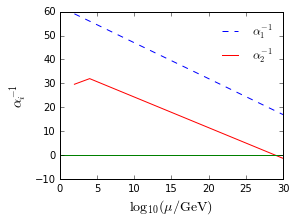

In [47]:
rgefig(ts, ys)

In [48]:
print("One-loop pole is at {:.1g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

One-loop pole is at 9e+28 GeV.


This is in nice agreement with Di Luzio et al's 9e28. arXiv:[1504.00359](http://www.arXiv.org/abs/1504.00359)

In [49]:
mu_max = 3.5e21  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [50]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

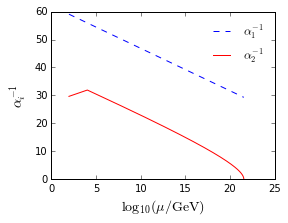

In [51]:
rgefig(ts, ys)

In [52]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 3.5e+21 GeV.


This is in nice agreement with Di Luzio et al. who have 4e21 GeV

### SM + real scalar (1,7,0)

In [53]:
threshs, cRGE = precalcRGE(thresholds=[(2.5e4, RealScalar(1,7,0))])

In [54]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

In [55]:
mu_max = 1e42  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [56]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,)) 

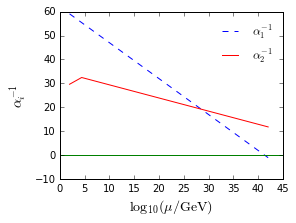

In [57]:
rgefig(ts, ys)

In [58]:
print("One-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,0]).argmin()])))

One-loop pole is at 1.9e+41 GeV.


This is in nice agreement with Di Luzio et al's 1.9e41.

In [59]:
mu_max = 7.4e20  # we integrate up to this scale in GeV
npts = 3000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [60]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

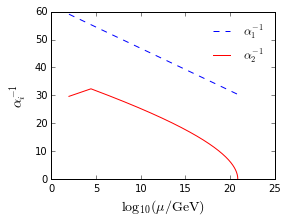

In [61]:
rgefig(ts, ys)

In [62]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 7.4e+20 GeV.


This is in nice agreement with Di Luzio et al. who have 8.9e20 GeV

### Ahriche et al model

In [63]:
threshs, cRGE = precalcRGE(thresholds=[(0.5e3, ComplexScalar(1,1,2)), (20e3, Weyl(1,7,0,ng)), (5*20e3, RealScalar(1,7,2))])

In [64]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

#### One-loop RGE running

In [65]:
mu_max = 1e6  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [66]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,)) 

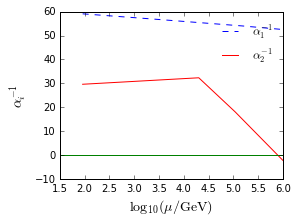

In [67]:
rgefig(ts, ys)

In [68]:
print("One-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

One-loop pole is at 7.8e+05 GeV.


#### Two-loop RGE running

In [69]:
mu_max = 2.83e5  # we integrate up to this scale in GeV
npts = 2000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [70]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

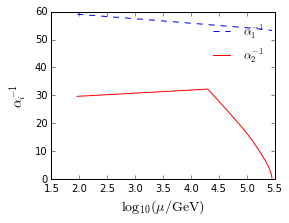

In [71]:
rgefig(ts, ys)

In [72]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 2.8e+05 GeV.


This is factor 2 below Aristizabal Sierra et al's 6e5 GeV from their Fig. 6.

### Triplet neutrino mass model

In [73]:
threshs, cRGE = precalcRGE(thresholds=[(0.375e3, ComplexScalar(1,1,2)), (0.375e3, Weyl(1,2,1, ng)), (0.375e3, Weyl(1,2,-1, ng)), (0.375e3, RealScalar(1,3,0))])

In [74]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

#### One-loop RGE running

In [75]:
mu_max = 1e33  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [76]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,)) 

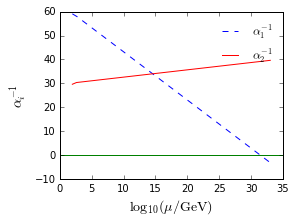

In [77]:
rgefig(ts, ys)

In [78]:
print("One-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,0]).argmin()])))

One-loop pole is at 2.8e+31 GeV.


#### Two-loop RGE running

In [79]:
mu_max = 1e31  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [80]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

/usr/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


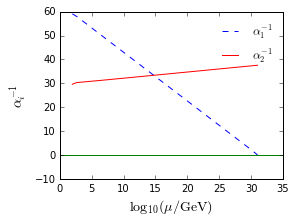

In [81]:
rgefig(ts, ys)

In [82]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,0]).argmin()])))

Two-loop pole is at 1e+31 GeV.


So we are beyond Planck mass ...

### ČKP model

In [83]:
threshs, cRGE = precalcRGE(thresholds=[(1e3, ComplexScalar(1,2,1)), (10e3, Weyl(1,5,0,ng)), (5*10e3, [ComplexScalar(1,5,-2),RealScalar(1,7,0)])])

In [84]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

#### One-loop RGE running

In [85]:
mu_max = 1e8  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [86]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,)) 

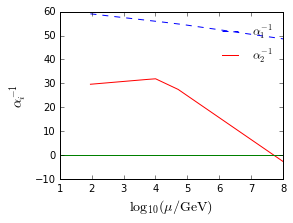

In [87]:
rgefig(ts, ys)

In [88]:
print("One-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

One-loop pole is at 5.1e+07 GeV.


#### Two-loop RGE running

In [89]:
mu_max = 4.55e6  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [90]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

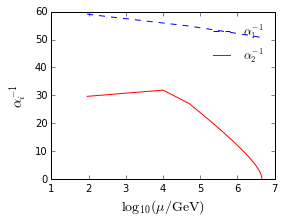

In [91]:
rgefig(ts, ys)

In [92]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 4.6e+06 GeV.


This agrees with Aristizabal Sierra et al's 5.e6 GeV.

### ČKP model (with low-lying 5-plet scalar)

In [93]:
threshs, cRGE = precalcRGE(thresholds=[(400, ComplexScalar(1,5,-2)), (750, ComplexScalar(1,2,1)), (10e3, Weyl(1,5,0,ng)), (5*10e3, RealScalar(1,7,0))])

In [94]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

#### Two-loop RGE running

In [95]:
mu_max = 2.331e6  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [96]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

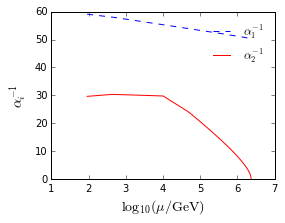

In [97]:
rgefig(ts, ys)

In [98]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 2.3e+06 GeV.


### ČKP model (with low-lying 5-plet and 7-plet scalars)

In [99]:
threshs, cRGE = precalcRGE(thresholds=[(400, [ComplexScalar(1,5,-2), RealScalar(1,7,0)]), (750, ComplexScalar(1,2,1)), (10e3, Weyl(1,5,0,ng))])

In [100]:
def func(y, t, twoloop=True):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0 

#### Two-loop RGE running

In [101]:
mu_max = 7.8e5  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [102]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,)) 

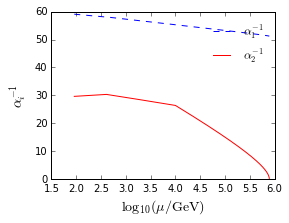

In [103]:
rgefig(ts, ys)

In [104]:
print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[abs(ys[:,1]).argmin()])))

Two-loop pole is at 7.8e+05 GeV.


## Automatic search and plotting

In [105]:
def find_pole(mchi=375, msig=10, mphi=None, mTHD=750, upto=1e10, invpole=1e-4, npts=3000, twoloop=True):
    """Return Landau pole and  RGE curves for theory."""
    if not mphi:
        mphi = mchi
    threshs, cRGE = precalcRGE(thresholds=[(mchi, RealScalar(1,7,0)), (mphi, ComplexScalar(1,5,-2)), (mTHD, ComplexScalar(1,2,1)), (msig*1e3, Weyl(1,5,0,ng))])
    def func(y, t):
        """Derivative of inverse alpha.
        d inv_alpha/dt = c0 + c1/inv_alpha
        """
        c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
        if twoloop:
            return c0 + c1.dot(1/y)
        else:
            return c0 
    ystart = y0
    ts = np.linspace(0, t(upto), npts)
    while np.any(abs(ystart) > invpole):
        ys = odeint(func, y0, ts) 
        try:
            last = np.where(ys<invpole)[0][0]-1   # note that negative will also satisfy here
        except IndexError:
            break
        ystart = ys[last]
        ts = np.linspace(ts[last], ts[last+1], npts)
    #print("Two-loop pole is at {:.2g} GeV.".format(mu(ts[last])))
    pole = mu(ts[last])
    ts = np.linspace(0, ts[last], npts)
    ys = odeint(func, y0, ts) 
    return pole #, ts, ys

What follows is Fig. 6 from http://arXiv.org/pdf/1603.04723

/usr/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in less


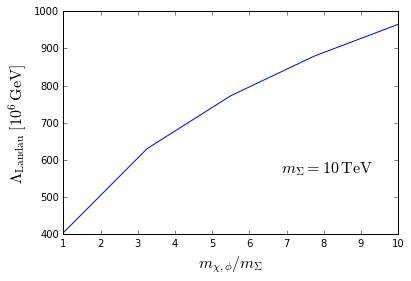

In [106]:
mrats = np.linspace(1,10, 5)
Lpoles = []
for mr in mrats:
    pole = find_pole(mchi=mr*1e4, mphi=mr*1e4, msig=10e3, mTHD=1e3, upto=1e18, npts=2000)
    Lpoles.append(pole/1e6)
plt.plot(mrats, Lpoles)
plt.annotate(r"$m_\Sigma = 10\, {\rm TeV}$", xy=(0.65, 0.28), xycoords='axes fraction', fontsize=16)
plt.xlabel(r'$m_{\chi,\phi}/m_\Sigma}$', fontsize=16)
fig = plt.ylabel(r"$\Lambda_{\rm Landau} \; [10^6\,{\rm GeV}]$", fontsize=16)

In [107]:
from math import floor, log10
import matplotlib.ticker as ticker

In [108]:
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if not exponent:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

In [109]:
def fmtGeV(x, pos):
    """Scientific notation formatter."""
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}\,{{\rm GeV}}$'.format(a, b)

In [110]:
np_find_pole = np.frompyfunc(find_pole, 2, 1)

/usr/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in less


CPU times: user 1min 25s, sys: 247 ms, total: 1min 26s
Wall time: 1min 26s


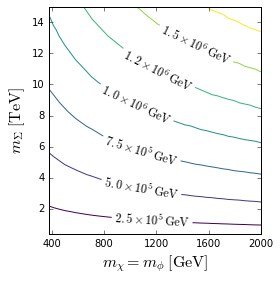

In [111]:
%%time
resolution = 40  # of calculation grid 
xs = np.linspace(375, 2000, resolution)
ys = np.linspace(0.375, 15, resolution)
#levels = [3, 6, 9]
X, Y = np.meshgrid(xs, ys)
Z = np_find_pole(X, Y)
fig, ax = plt.subplots(figsize=(4,4))
CS = plt.contour(X, Y, Z, cmap=plt.cm.viridis)
#CS = plt.contour(X, Y, Z, locator=plt.Locator(), cmap=plt.cm.viridis)
#CS = plt.contour(X, Y, Z, levels, cmap=plt.cm.viridis)
fig = plt.clabel(CS, inline=1, fmt=ticker.FuncFormatter(fmtGeV), fontsize=12, colors='black')
#fig = plt.clabel(CS, inline=1, fmt=r'$%.0g \;{\rm GeV}$', fontsize=12, colors='black')
ax.set_xlabel(r'$m_\chi = m_\phi \; {\rm [GeV]}$', fontsize=16)
ax.set_ylabel(r"$m_\Sigma \; {\rm [TeV]}$", fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(400))
plt.tight_layout()
plt.savefig("/home/kkumer/landau.pdf")